* 자연어: 우리가 일상 생활에서 사용하는 언어 -> 아나콘다/코랩: 자연어 처리 수단
* 필요 프레임 워크 / 라이브러리: pip install tensor flow / pip install keras / pip install genism / pip install scikit-learn / jupyter notebook
* jupyter notebook: 아나콘다에 jupyter notebook 입력. 혹은 웹에 localhost:8888
* 자연어처리 패키지: NLTK / pip install konlpy
* pandas: 데이터 처리를 위한 라이브러리. 데이터 분석에 필수. (import pandas as pd)


In [ ]:
import pandas as pd

## pandas의 데이터 구조: 1. Series     2. DataFrame    3. Panel

In [11]:
#1. Series
sr1 = pd.Series([17000, 18000], ['치킨', '피자'])
sr2 = pd.Series([1000, 5000], index = ['콜라', '맥주'])

* pd.Series([values], [index])의 구조. 1차원 배열의 value에 대응되는 index 부여 가능.
* 주의할 점: pd.Series에서 Series의 첫 글자를 대문자로 해야 error가 나지 않는다. 
* index에 대해 그냥 [index]로 써도 되고, index = [index]로 써도 된다.

In [10]:
print(sr1.values, sr2.index)

[17000 18000] Index(['콜라', '맥주'], dtype='object')


In [12]:
#2. Data Frame
values = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
index = ['one', 'two', 'three']
columns = ['a', 'b', 'c']

df = pd.DataFrame(values, index = index, columns = columns)
print(df)

       a  b  c
one    1  2  3
two    4  5  6
three  7  8  9


In [15]:
print(df.index)
print(df.columns)
print(df.values)

Index(['one', 'two', 'three'], dtype='object')
Index(['a', 'b', 'c'], dtype='object')
[[1 2 3]
 [4 5 6]
 [7 8 9]]


* pd.DataFrame(values, index = index, columns = columns)의 2차원 구조. row의 index는 index / columns의 index는 columns
* df.columns를 출력해보면 알 수 있듯, 방향만 다를 뿐 index, columns 둘 다 index다.
* DataFrame이 가장 많이 사용되는 데이터 구조다.

### 데이터 프레임은 list, series, dict, numpy의 ndarrays 등으로 생성 가능

In [20]:
#2차원 list를 DataFrame으로 만들 수 있다.
data = [['1000', 'steve', 90], ['1001', 'James', 78], ['1002', 'Doyeon', 98]]
df1 = pd.DataFrame(data)
print(df1)
df2 = pd.DataFrame(data, index = [1, 2, 3], columns = ['학번', '이름', '점수'])
print(df2)

      0       1   2
0  1000   steve  90
1  1001   James  78
2  1002  Doyeon  98
     학번      이름  점수
1  1000   steve  90
2  1001   James  78
3  1002  Doyeon  98


*index를 따로 지정하지 않을 경우 default는 0, 1, 2, 3...이고, 따로 지정할 수도 있다.

In [22]:
#dict로 DataFrame 만들기. 
data = {'학번' : ['1000', '1001', '1002'], '이름' : ['상준', '준용', '현수'],
        '점수' : [100, 78, 96]}
df3 = pd.DataFrame(data)
print(df3)

     학번  이름   점수
0  1000  상준  100
1  1001  준용   78
2  1002  현수   96


* dict로 만들면 열 방향으로 데이터가 정렬됨에 유의하자. 또한 columns 값은 자동으로 배정된다.

### DataFrame 조회 명령어들

In [28]:
print(df3.head(2))
print(df3.tail(2))
print('\n')
print(df3['점수'])

     학번  이름   점수
0  1000  상준  100
1  1001  준용   78
     학번  이름  점수
1  1001  준용  78
2  1002  현수  96


0    100
1     78
2     96
Name: 점수, dtype: int64


* df.head(n): 위부터 n행의 데이터 조회. df.tail(n): 아래부터 n행
* df['columns의 이름']: 해당되는 열을 확인

### pandas로 외부 데이터 읽기
* pandas는 csv, txt, excel, SQL, HTML, JSON 등 다양한 데이터 파일을 읽어, 데이터 프레임을 생성할 수 있다.
* 예를 들어 csv를 읽을 땐, pandas.read_csv('읽으려는 파일의 경로')를 통해 읽을 수 있다.
* ex) df=pd.read_csv(r'C:\Users\USER\Desktop\example.csv')

## Numpy
* 수치 데이터를 다루는 패키지. ndarray라는 다차원 행렬 구조를 자주 사용하여 선형 대수 계산.
* 속도 면에서 순수 파이썬에 비해 압도적으로 빠르다.
### np.array

In [30]:
import numpy as np

In [31]:
#1차원 list
a = np.array([1, 2, 3, 4, 5])
print(type(a))
print(a)

<class 'numpy.ndarray'>
[1 2 3 4 5]


In [34]:
#2차원 list
b = np.array([[10,20,30], [60,70,80]])
print(b)
print(b.ndim)     #몇차원인지?
print(b.shape)    #모양, 크기

[[10 20 30]
 [60 70 80]]
2
(2, 3)


* np.array()는 list, tuple, 배열(array)로부터 ndarray를 생성 가능

In [38]:
a = np.zeros((2, 3))
b = np.ones((2, 3))
c = np.full((2, 2), 7)     #특정 값으로 ndarray를 가득 채움.
print(a)
print(b)
print(c)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[7 7]
 [7 7]]


In [42]:
a = np.eye(3)      #대각선으로 1, 나머지는 0인 2차원 배열 생성. n행. 이 경우 3행
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [43]:
a = np.random.random((2, 2))         #0과 1 사이 랜덤 값으로 채워진 배열 생성.
print(a)

[[0.98590721 0.49167378]
 [0.72028133 0.9302553 ]]


### np.arange
* range를 바탕으로 배열 생성

In [44]:
a = np.arange(5)
print(a)

[0 1 2 3 4]


In [47]:
a = np.arange(1, 20, 3.5)
print(a)

[ 1.   4.5  8.  11.5 15.  18.5]


In [51]:
a = np.arange(30).reshape(5, 6)
print(a)              
#arange를 통해 만든 range에 reshpae method를 써 다차원으로 변형 가능.
b = np.arange(30).reshape(2, 3, 5)
print(b)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]


### numpy 슬라이싱 / 인덱싱
* numpy의 ndarray에서도 파이썬 기본 리스트의 슬라이싱 기능을 지원한다. 다만 문법 차이에 유의.

In [2]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])
b = a[0:2, 0:2]         #0:2이므로, index 0과 1(2를 제외한)를 슬라이싱.
print(b)

[[1 2]
 [4 5]]


In [6]:
b = a[:, :]     #전체 다 출력
c = a[0, :]     #row 기준 index o의 row 출력. 여기선 :를 출력하지 않는다!
d = a[:, 1]     #columns 기준 index 1의 column 출력
print(b, c, d)

[[1 2 3]
 [4 5 6]] [1 2 3] [2 5]


In [17]:
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print([x[2][1], x[1][0]])        #파이썬의 기본 리스트는 이런 방법으로 indexing.
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a[[2, 1], [1, 0]]           #ndarray의 indexing. 순서 차이에 유의
print(b)

[8, 4]
[8 4]


### numpy 계산
* 사칙연산 전부 가능. 다만 기본적으론, 직관적으로 같은 자리끼리 연산한다.
* 행렬의 연산을 하고 싶으면 np.dot() 등을 써야 한다.

In [20]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(a+b)
print(a-b)
print(a*b)
print(a/b)

[[ 6  8]
 [10 12]]
[[-4 -4]
 [-4 -4]]
[[ 5 12]
 [21 32]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [21]:
np.dot(a,b)           #dot product. 행렬의 곱셈.

array([[19, 22],
       [43, 50]])

## MatPlotLib
* 데이터를 chart나 plot으로 시각화하는 패키지. 주요 모듈으론 pyplot이 있다.

In [22]:
import matplotlib.pyplot as plt

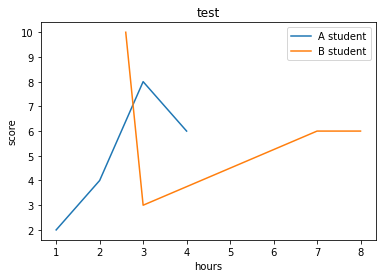

In [27]:
plt.title('test')                  #상단 제목 입력
plt.plot([1,2,3,4],[2,4,8,6])      #x축: [1, 2, 3 ,4]  y축: [2, 4, 8, 6] -> (1,2), (2, 4), (3, 8), (4, 6)
plt.xlabel('hours')                #x축의 label
plt.ylabel('score')                #y축의 label
plt.plot([2.6, 3, 7, 8], [10, 3, 6, 6])     #그냥 다른 데이터를 plot하면 또다른 라인을 추가 가능
plt.legend(['A student', 'B student'])      #범례 추가
plt.show()